In [57]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
xy = load_digits(as_frame = True)

xy.frame.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [45]:
def convert_to_class_indices(y :torch.Tensor):
    return np.argmax(torch.nn.Softmax(dim=1)(y).detach().numpy(),axis=1)

class MNISTDataset(torch.utils.data.Dataset):
    def __init__(self):
        xy = load_digits()
        
        x_train, x_test, y_train, y_test  = train_test_split(xy.data, xy.target, test_size = 0.15,random_state = 1)
        self.x = torch.from_numpy(x_train.astype(np.float32))
        self.y = torch.from_numpy(y_train.astype(np.int64))
        self.x_test = torch.from_numpy(x_test.astype(np.float32))
        self.y_test = torch.from_numpy(y_test.astype(np.int64))
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.x.shape[0]
    
dataset = MNISTDataset()
    
batch_size = 32

dataloader = torch.utils.data.DataLoader(dataset = dataset, batch_size = batch_size, shuffle = True)
        

In [46]:
class NNet1(torch.nn.Module):
    def __init__(self):
        super(NNet1, self).__init__()
        self.lin1 = torch.nn.Linear(64,32)
        self.lin2 = torch.nn.Linear(32,16)
        self.lin3 = torch.nn.Linear(16,10)
        self.activation1 = torch.nn.ReLU()
        self.activation2 = torch.nn.ReLU()
        
    def forward(self, X):
        X = self.activation1(self.lin1(X))
        X = self.activation2(self.lin2(X))
        X = self.lin3(X)
        return X
        


In [189]:
model1 = NNet1()

optimizer = torch.optim.Adam(model1.parameters())

loss = torch.nn.CrossEntropyLoss()

In [190]:
epochs = 100

for i in range(epochs):
    for data, target in dataloader:
        y_hat = model1(data)
        
        l = loss(y_hat, target)
        
        l.backward()
        
        optimizer.step()
        
        optimizer.zero_grad()
        
    if i%10 == 0:
        with torch.no_grad():
            print("epoch", i, "test",accuracy_score(dataset.y_test, convert_to_class_indices(model1(dataset.x_test))))
            print("epoch", i, "train",accuracy_score(dataset.y, convert_to_class_indices(model1(dataset.x))))
        

epoch 0 test 0.6333333333333333
epoch 0 train 0.5939751146037983
epoch 10 test 0.9740740740740741
epoch 10 train 0.9842829076620825
epoch 20 test 0.9740740740740741
epoch 20 train 0.9967256057629339
epoch 30 test 0.9703703703703703
epoch 30 train 0.9993451211525868
epoch 40 test 0.9777777777777777
epoch 40 train 1.0
epoch 50 test 0.9740740740740741
epoch 50 train 1.0
epoch 60 test 0.9777777777777777
epoch 60 train 1.0
epoch 70 test 0.9814814814814815
epoch 70 train 1.0
epoch 80 test 0.9814814814814815
epoch 80 train 1.0
epoch 90 test 0.9851851851851852
epoch 90 train 1.0


In [93]:
print(accuracy_score(dataset.y_test, convert_to_class_indices(model1(dataset.x_test))))
print(accuracy_score(dataset.y, convert_to_class_indices(model1(dataset.x))))

0.9851851851851852
1.0


In [109]:
def show_num_and_pred(i):
    fig, axes = plt.subplots(1,1, figsize = (2,2))
    axes.imshow(dataset.x_test[i].reshape(8,8), cmap = "Greys")
    print("predicted:",convert_to_class_indices(model1(dataset.x_test[i].reshape(1,-1))))
    print("correct:",dataset.y_test[i].item())

In [110]:
wrong = np.arange(len(dataset.y_test))[dataset.y_test.numpy() != convert_to_class_indices(model1(dataset.x_test))]
wrong
#print(dataset.y_test.numpy() != convert_to_class_indices(model1(dataset.x_test)))

array([ 88, 173, 174, 203])

predicted: [9]
correct: 1


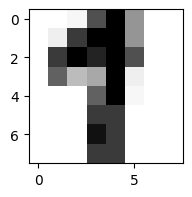

In [114]:
show_num_and_pred(203)

In [115]:
#results:
#0.9851851851851852
#1.0

In [116]:
#Let's try weight decay

In [184]:
model2 = NNet1()

optimizer = torch.optim.Adam(model2.parameters(), weight_decay = 0.015)

loss = torch.nn.CrossEntropyLoss()

In [193]:
epochs = 100

for i in range(epochs):
    for data, target in dataloader:
        y_hat = model2(data)
        
        l = loss(y_hat, target)
        
        l.backward()
        
        optimizer.step()
        
        optimizer.zero_grad()
        
    if i%10 == 0:
        with torch.no_grad():
            print("epoch", i, "test",accuracy_score(dataset.y_test, convert_to_class_indices(model2(dataset.x_test))))
            print("epoch", i, "train",accuracy_score(dataset.y, convert_to_class_indices(model2(dataset.x))))
        

epoch 0 test 0.9851851851851852
epoch 0 train 0.9973804846103471
epoch 10 test 0.9851851851851852
epoch 10 train 0.9973804846103471
epoch 20 test 0.9851851851851852
epoch 20 train 0.9973804846103471
epoch 30 test 0.9851851851851852
epoch 30 train 0.9973804846103471
epoch 40 test 0.9851851851851852
epoch 40 train 0.9973804846103471
epoch 50 test 0.9851851851851852
epoch 50 train 0.9973804846103471
epoch 60 test 0.9851851851851852
epoch 60 train 0.9973804846103471
epoch 70 test 0.9851851851851852
epoch 70 train 0.9973804846103471
epoch 80 test 0.9851851851851852
epoch 80 train 0.9973804846103471
epoch 90 test 0.9851851851851852
epoch 90 train 0.9973804846103471


In [142]:
print(accuracy_score(dataset.y_test, convert_to_class_indices(model2(dataset.x_test))))
print(accuracy_score(dataset.y, convert_to_class_indices(model2(dataset.x))))

0.9925925925925926
1.0


In [122]:
#weight_decay = 0.01
#0.9888888888888889
#1.0

In [133]:
#weight_decay = 0.02  it keep oscillating around this
#0.9888888888888889
#0.9986902423051736

In [143]:
#weight_decay = 0.015
#0.9925925925925926
#1.0

In [144]:
#Let's experiment with Dropout and BatchNorm layers:

In [203]:
class NNet2(torch.nn.Module):
    def __init__(self):
        super(NNet2, self).__init__()
        self.lin1 = torch.nn.Linear(64,32)
        self.lin2 = torch.nn.Linear(32,16)
        self.lin3 = torch.nn.Linear(16,10)
        self.activation1 = torch.nn.ReLU()
        self.norm = torch.nn.BatchNorm1d(num_features = 16)
        self.dropout = torch.nn.Dropout(p=0.2)
        
    def forward(self, X):
        X = self.activation1(self.lin1(X))
        X = self.lin2(X)
        X = self.norm(X)
        X = self.dropout(X)
        X = self.activation1(X)
        X = self.lin3(X)
        return X

In [204]:
model3 = NNet2()

loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model3.parameters())

In [206]:
model3.train()

epochs = 100

for i in range(epochs):
    for data, target in dataloader:
        y_hat = model3(data)
        
        l = loss(y_hat, target)
        
        l.backward()
        
        optimizer.step()
        
        optimizer.zero_grad()
        
    if i%10 == 0:
        with torch.no_grad():
            model3.eval()
            print("epoch", i, "test",accuracy_score(dataset.y_test, convert_to_class_indices(model3(dataset.x_test))))
            print("epoch", i, "train",accuracy_score(dataset.y, convert_to_class_indices(model3(dataset.x))))
        model3.train()

epoch 0 test 0.9814814814814815
epoch 0 train 1.0
epoch 10 test 0.9814814814814815
epoch 10 train 1.0
epoch 20 test 0.9777777777777777
epoch 20 train 0.9993451211525868
epoch 30 test 0.9888888888888889
epoch 30 train 1.0
epoch 40 test 0.9851851851851852
epoch 40 train 1.0
epoch 50 test 0.9851851851851852
epoch 50 train 1.0
epoch 60 test 0.9814814814814815
epoch 60 train 1.0
epoch 70 test 0.9851851851851852
epoch 70 train 1.0
epoch 80 test 0.9925925925925926
epoch 80 train 1.0
epoch 90 test 0.9851851851851852
epoch 90 train 1.0


In [201]:
model3.eval()
print(accuracy_score(dataset.y_test, convert_to_class_indices(model3(dataset.x_test))))
print(accuracy_score(dataset.y, convert_to_class_indices(model3(dataset.x))))

0.9814814814814815
1.0
